In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
pd.set_option('display.max_column',50)

In [7]:
fat_df = pd.read_csv('./Fat_Supply_Quantity_Data.csv')
Protein = pd.read_csv('./Protein_Supply_Quantity_Data.csv')

# 1. 데이터 확인

In [9]:
fat_df.head()

,Country,Alcoholic Beverages,Animal Products,Animal fats,"Aquatic Products, Other",Cereals - Excluding Beer,Eggs,"Fish, Seafood",Fruits - Excluding Wine,Meat,Miscellaneous,Milk - Excluding Butter,Offals,Oilcrops,Pulses,Spices,Starchy Roots,Stimulants,Sugar Crops,Sugar & Sweeteners,Treenuts,Vegetal Products,Vegetable Oils,Vegetables,Obesity,Undernourished,Confirmed,Deaths,Recovered,Active,Population,Unit (all except Population)
0,Afghanistan,0.0,21.6397,6.2224,0.0,8.0353,0.6859,0.0327,0.4246,6.1244,0.0163,8.2803,0.3103,1.0452,0.1960,0.2776,0.0490,0.0980,0.0,0.0,0.7513,28.3684,17.0831,0.3593,4.5,29.8,0.142134,0.006186,0.123374,0.012574,38928000.0,%
1,Albania,0.0,32.0002,3.4172,0.0,2.6734,1.6448,0.1445,0.6418,8.7428,0.0170,17.7576,0.2933,3.1622,0.1148,0.0000,0.0510,0.5270,0.0,0.0,0.9181,17.9998,9.2443,0.6503,22.3,6.2,2.967301,0.050951,1.792636,1.123714,2838000.0,%
2,Algeria,0.0,14.4175,0.8972,0.0,4.2035,1.2171,0.2008,0.5772,3.8961,0.0439,8.0934,0.1067,1.1983,0.2698,0.1568,0.1129,0.2886,0.0,0.0,0.8595,35.5857,27.3606,0.5145,26.6,3.9,0.244897,0.006558,0.167572,0.070767,44357000.0,%
3,Angola,0.0,15.3041,1.3130,0.0,6.5545,0.1539,1.4155,0.3488,11.0268,0.0308,1.2309,0.1539,3.9902,0.3282,0.0103,0.7078,0.1128,0.0,0.0,0.0308,34.7010,22.4638,0.1231,6.8,25,0.061687,0.001461,0.056808,0.003419,32522000.0,%
4,Antigua and Barbuda,0.0,27.7033,4.6686,0.0,3.2153,0.3872,1.5263,1.2177,14.3202,0.0898,6.6607,0.1347,1.3579,0.0673,0.3591,0.0449,1.0549,0.0,0.0,0.2020,22.2995,14.4436,0.2469,19.1,NaN,0.293878,0.007143,0.190816,0.095918,98000.0,%


In [10]:
Protein.head()

,Country,Alcoholic Beverages,Animal Products,Animal fats,"Aquatic Products, Other",Cereals - Excluding Beer,Eggs,"Fish, Seafood",Fruits - Excluding Wine,Meat,Milk - Excluding Butter,Offals,Oilcrops,Pulses,Spices,Starchy Roots,Stimulants,Sugar Crops,Sugar & Sweeteners,Treenuts,Vegetal Products,Vegetable Oils,Vegetables,Miscellaneous,Obesity,Undernourished,Confirmed,Deaths,Recovered,Active,Population,Unit (all except Population)
0,Afghanistan,0.0000,9.7523,0.0277,0.0,35.9771,0.4067,0.0647,0.5824,3.1337,5.5278,0.5916,0.2034,1.2479,0.1664,0.1941,0.5546,0.0,0.0000,0.1387,40.2477,0.0000,1.1370,0.0462,4.5,29.8,0.142134,0.006186,0.123374,0.012574,38928000.0,%
1,Albania,0.1840,27.7469,0.0711,0.0,14.2331,1.8069,0.6274,1.2757,7.6582,16.4750,1.1084,0.3722,1.4555,0.0000,0.8867,0.2635,0.0,0.0042,0.2677,22.2552,0.0084,3.2456,0.0544,22.3,6.2,2.967301,0.050951,1.792636,1.123714,2838000.0,%
2,Algeria,0.0323,13.8360,0.0054,0.0,26.5633,1.2916,0.6350,1.1624,3.5088,8.0616,0.3283,0.1830,2.5509,0.1776,1.4638,0.4628,0.0,0.0000,0.2745,36.1694,0.0269,3.1267,0.1399,26.6,3.9,0.244897,0.006558,0.167572,0.070767,44357000.0,%
3,Angola,0.6285,15.2311,0.0277,0.0,20.3882,0.1756,5.4436,1.2754,7.6248,1.1460,0.8133,2.1534,4.0850,0.0000,5.1941,0.1017,0.0,0.0092,0.0092,34.7782,0.0092,0.8133,0.0924,6.8,25,0.061687,0.001461,0.056808,0.003419,32522000.0,%
4,Antigua and Barbuda,0.1535,33.1901,0.1289,0.0,10.5108,0.4850,8.2146,1.2586,16.0670,7.4349,0.8534,0.7674,0.8841,0.3438,0.4666,0.4113,0.0,0.0000,0.0737,16.8161,0.0430,1.6024,0.2947,19.1,NaN,0.293878,0.007143,0.190816,0.095918,98000.0,%


In [4]:
fat_df.columns

Index(['Country', 'Alcoholic Beverages', 'Animal Products', 'Animal fats',
       'Aquatic Products, Other', 'Cereals - Excluding Beer', 'Eggs',
       'Fish, Seafood', 'Fruits - Excluding Wine', 'Meat', 'Miscellaneous',
       'Milk - Excluding Butter', 'Offals', 'Oilcrops', 'Pulses', 'Spices',
       'Starchy Roots', 'Stimulants', 'Sugar Crops', 'Sugar & Sweeteners',
       'Treenuts', 'Vegetal Products', 'Vegetable Oils', 'Vegetables',
       'Obesity', 'Undernourished', 'Confirmed', 'Deaths', 'Recovered',
       'Active', 'Population', 'Unit (all except Population)'],
      dtype='object')

In [21]:
df = fat_df[['Obesity', 'Undernourished', 'Confirmed','Deaths', 'Recovered']]

In [22]:
df = df.dropna()

In [23]:
df.isnull().sum()

Obesity           0
Undernourished    0
Confirmed         0
Deaths            0
Recovered         0
dtype: int64

In [24]:
def change(x):
    if x == '<2.5':
        x = 0
        return float(x)
    else:
        return float(x)

In [25]:
df['Undernourished'] = df.Undernourished.apply(lambda x: change(x))

In [26]:
df['Undernourished'].value_counts()

0.0     44
6.2      3
16.5     3
4.3      2
2.7      2
        ..
9.7      1
36.8     1
24.9     1
51.3     1
25.0     1
Name: Undernourished, Length: 94, dtype: int64

In [27]:
df.describe()

,Obesity,Undernourished,Confirmed,Deaths,Recovered
count,156.000000,156.000000,156.000000,156.000000,156.000000
mean,18.598077,10.507051,2.071900,0.040340,1.481451
std,9.549116,12.304241,2.385296,0.049192,1.946244
min,2.100000,0.000000,0.000312,0.000000,0.000000
25%,8.350000,0.000000,0.141985,0.002128,0.099107
50%,21.550000,6.900000,1.069339,0.013166,0.494358
75%,25.700000,14.825000,3.561377,0.070584,2.662680
max,45.500000,59.600000,10.408199,0.185428,9.039871


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 156 entries, 0 to 169
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Obesity         156 non-null    float64
 1   Undernourished  156 non-null    float64
 2   Confirmed       156 non-null    float64
 3   Deaths          156 non-null    float64
 4   Recovered       156 non-null    float64
dtypes: float64(5)
memory usage: 7.3 KB


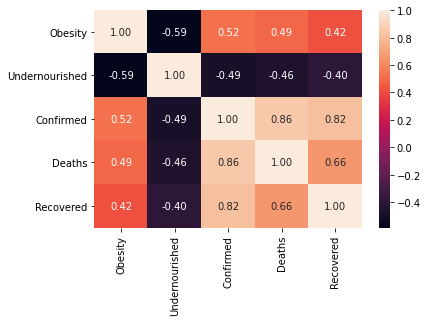

In [45]:
sns.heatmap(data = df.corr(), annot=True, fmt = '.2f')
plt.show()

# 영양 실조와 사망/회복의 관계는 음의 상관관계
# 비만과 사망/회복의 관계는 양의 상관관계

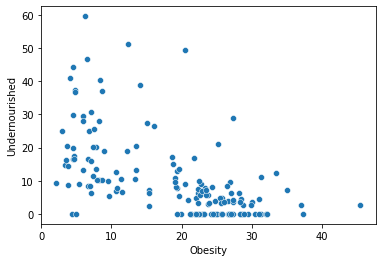

In [53]:
sns.scatterplot(x='Obesity', y='Undernourished', data=df)
plt.show()

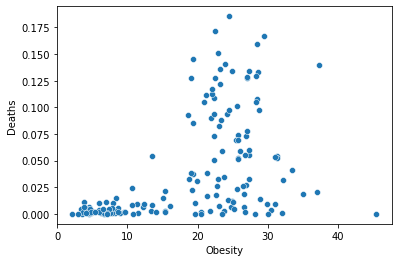

In [58]:
sns.scatterplot(x='Obesity', y='Deaths', data=df)
plt.show()

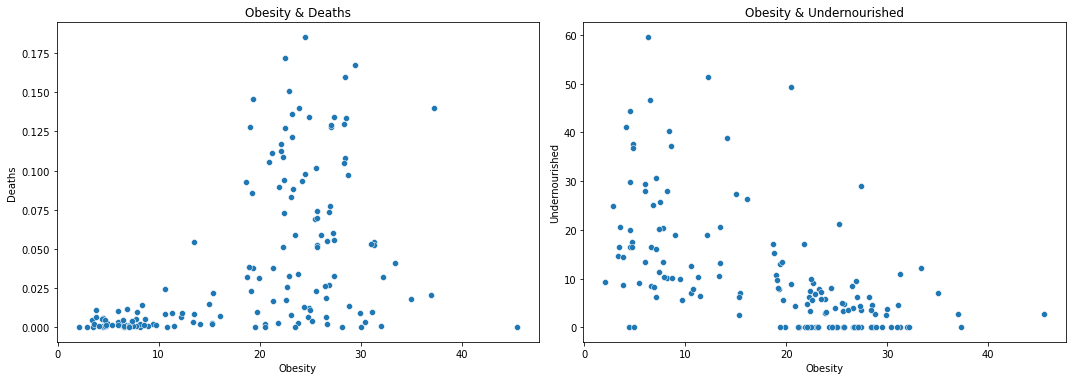

In [72]:
scatter_cols = ['Deaths', 'Undernourished']

plt.subplots(figsize=(15, 15))
for i,c in enumerate(scatter_cols):
    plt.subplot(3,2,i+1)
    sns.scatterplot(x='Obesity',y=c, data=df)
    plt.title('Obesity & ' + c)
    plt.tight_layout()
    
plt.show()